## Beep maker
### exercise 2: EXPLORING PITCH STRUCTURES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

# from the y21 notebook-- do we need these?
from subprocess import Popen
import subprocess as sp
import os

import sys

import IPython.display as ipd

from funcs import bips as bip

from scipy.signal.windows import gaussian


##  Pitches, scales, elements, frequencies, etc... 
### (1) Frequencies and tonal relationships
### (2) Visualizing tonal relationships 
### (3) Pitch wheels
### (4) Modes -- Dictionaries and lists

------------------------------------------
In mb01, we made simple tones and chords from sine wave oscillators. <br>
Here, we will start with a little bit of music theory, <br>
using loops to make sequences of tones of different pitch (scales! arpeggios!) <br>
This notebook provides background for data-driven sonification in the next notebook. <br>

This notebook also sneaks in some intro to essential python elements: dictionaries, functions and loops. 

Difference between Overtones and Harmonics:  <br>
From Wikipedia: (https://en.wikipedia.org/wiki/Overtone) <br>
An overtone is any frequency greater than the fundamental frequency of a sound. Using the model of Fourier analysis, the fundamental and the overtones together are called partials. Harmonics, or more precisely, harmonic partials, are partials whose frequencies are numerical integer multiples of the fundamental (including the fundamental, which is 1 times itself). <br>

Refs: <br>
Hermann Helmholtz "On the Sensations of Tone" 1863 !! <br>
Gareth Loy "Musimathics, vol. 1" 2006<br>

In [2]:
# Octaves
root = 220.0 # "A3"

# An octave is the first harmonic, a multiple of 2.  
# octaves, by multiplication of integers (powers of 2, i.e. THE MODES OF A VIBRATING STRING!): 
octs = np.array([1,2,4,8]) # four octaves
freqs = root*octs
print(freqs)

#same octaves, by integer exponents of base 2. 
octs_exp = np.array([0,1,2,3])
freqs = root*2**octs_exp
print(freqs)

[ 220.  440.  880. 1760.]
[ 220.  440.  880. 1760.]


In [13]:
# make a chord of these four tones
reload(bip)
b = bip.beep()
dur = 2.0 # seconds
envmat = np.zeros((len(freqs),int(dur*b.fs))) # simple env: ones
env = bip.make_3pt_envelope(int(dur * b.fs), 0.2)
for i in range(len(freqs)):
    envmat[i,:] = env

b.make_bip(dur, freqs, envmat)
wf = b.wf/(np.max(np.abs(b.wf))) # normalize
# taper the waveform: 
wf = bip.taper_waveform(wf, alpha=0.05)

ipd.Audio(wf, rate=b.fs)

In [14]:
# make an arpeggio of beeps at these frequencies
reload(bip)
dur = 0.9  # seconds
track = np.array([])
b = bip.beep()
env = bip.make_3pt_envelope(int(dur * b.fs), 0.5)

for f in freqs:
    b.make_bip_1f(dur, f, env) # returns normalized waveform
    wf = b.wf 
    track = np.concatenate((track, wf))

ipd.Audio(track, rate=b.fs)

### "Equal temperament" (modern western instruments): 
On the piano, the octave is divided into 12 "semi-tone" intervals: <br>
$f = f_0*2^{v+k/12}$ <br>
$v$ is an integer that marks how many octaves you are above $f_0$ <br>
$k$ are integers that give you the number of intervals of the 12 that make the octave. <br>
<br>
For more on the origin of this, I recommend <br>
"Why you hear what you hear" by Eric Heller <br>

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
all semi-tones:
[220.         233.08188076 246.94165063 261.6255653  277.18263098
 293.66476792 311.12698372 329.62755691 349.22823143 369.99442271
 391.99543598 415.30469758 440.        ]

Intervals of the Major scale:
[2, 2, 1, 2, 2, 2, 1]

Elements of the Major scale:
[ 0.  2.  4.  5.  7.  9. 11. 12.]
[ 0.  2.  4.  5.  7.  9. 11. 12.]

Frequencies of the major scale, with root of 220 Hz:
[220.         246.94165063 277.18263098 293.66476792 329.62755691
 369.99442271 415.30469758 440.        ]


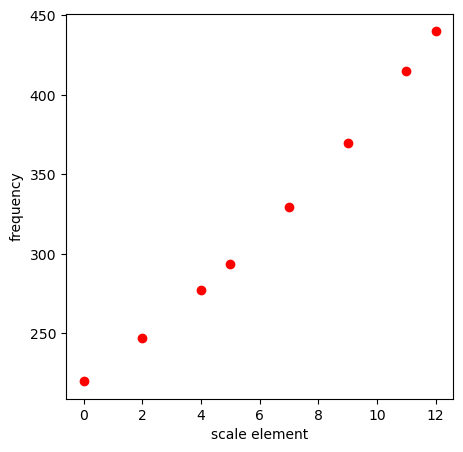

In [28]:
# make an array of integers: 
k = np.arange(0,12,1) # this makes a numpy array. 
print(k)
k = np.arange(12)
print(k)
k = np.arange(12+1)
print(k)

# ==============================
v = 0
root = 220
print('all semi-tones:')
f = root*2**(v+k/12)
print(f)

# ==============================
print('')
print('Intervals of the Major scale:')
intervals = [2,2,1,2,2,2,1]
print(intervals)
print('')
print('Elements of the Major scale:')
major_indxs = np.zeros(len(intervals)+1)
for i in range(1,len(major_indxs)):
    major_indxs[i] = major_indxs[i-1] + intervals[i-1]
print(major_indxs)

major_indxs = np.zeros(len(intervals)+1)
major_indxs[1:] = np.cumsum(intervals)
print(major_indxs)

# major = np.array([0,2,4,5,7,9,11,12])
# print(major)

# ==============================
print('')
print(f'Frequencies of the major scale, with root of {root} Hz:')
freqs = root*2**(v+major_indxs/12)
print(freqs)

# ==============================
fig = plt.figure(figsize=(5,5))
plt.plot(major_indxs,freqs, 'ro')
plt.xlabel('scale element')
plt.ylabel('frequency')
plt.show()

# ==============================
# make an arpeggio of beeps at these frequencies
reload(bip)
dur = 0.9  # seconds
track = np.array([])
b = bip.beep()
env = bip.make_3pt_envelope(int(dur * b.fs), 0.5)

for f in freqs:
    b.make_bip_1f(dur, f, env) # returns normalized waveform
    wf = b.wf 
    track = np.concatenate((track, wf))

ipd.Audio(track, rate=b.fs)

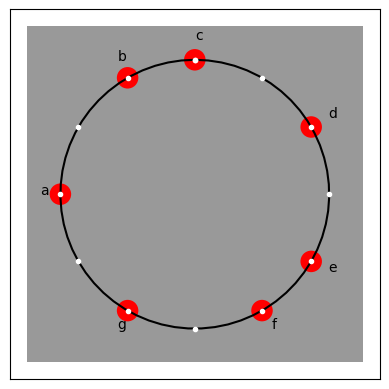

In [39]:
# show the pitch ring: 
reload(bip)
b = bip.beep()
bip.makePitchRing(major_indxs[0:-1])

# Make a database of pitches and names: 

In [47]:
pitch_classes = ['c','c#','d','d#','e','f','f#','g','g#','a','a#','b']

A4 = 440.0
C3 = A4 * 2**(3/12-1)
print(f'A4 = {A4}, C3={C3} Hz')

def notenum2freq(k,v,f0):
    freqs = f0*2**(v+k/12)
    return freqs

ints = np.arange(12)
print(ints)
ref_scale_freqs = notenum2freq(ints,0,C3)
print(ref_scale_freqs)

for pair in zip(pitch_classes,ref_scale_freqs):
    print(pair)

# Make a dictionary ! 
pitch_freq_ref = dict(zip(pitch_classes,ref_scale_freqs))
print('')
print(f'F3 = {pitch_freq_ref['f']:.2f} Hz')


A4 = 440.0, C3=261.6255653005986 Hz
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[261.6255653  277.18263098 293.66476792 311.12698372 329.62755691
 349.22823143 369.99442271 391.99543598 415.30469758 440.
 466.16376152 493.88330126]
('c', 261.6255653005986)
('c#', 277.1826309768721)
('d', 293.6647679174076)
('d#', 311.12698372208087)
('e', 329.6275569128699)
('f', 349.2282314330039)
('f#', 369.9944227116344)
('g', 391.99543598174927)
('g#', 415.30469757994507)
('a', 439.99999999999994)
('a#', 466.16376151808987)
('b', 493.88330125612407)

F3 = 349.23 Hz


# The Modes!
The intervals of the "modes": <br>
    'ionian' = [2,2,1,2,2,2,1] <br>
    'dorian' = [2,1,2,2,2,1,2] <br>
    'phrygian' = [1,2,2,2,1,2,2] <br>
    'lydian' = [2,2,2,1,2,2,1] <br>
    'mixolydian' = [2,2,1,2,2,1,2] <br>
    'aeolian' = [2,1,2,2,1,2,2] <br>
    'lochrian' = [1,2,2,1,2,2,2] <br>


In [40]:
# NOW LETS MAKE DICTIONARIES FOR THE MODES !! 

modes = {
    'ionian':[2,2,1,2,2,2,1],
    'dorian':[2,1,2,2,2,1,2],
    'phrygian':[1,2,2,2,1,2,2],
    'lydian':[2,2,2,1,2,2,1],
    'mixolydian':[2,2,1,2,2,1,2],
    'aeolian':[2,1,2,2,1,2,2],
    'lochrian':[1,2,2,1,2,2,2]
}

print(len(modes))

7


[2, 1, 2, 2, 2, 1, 2]


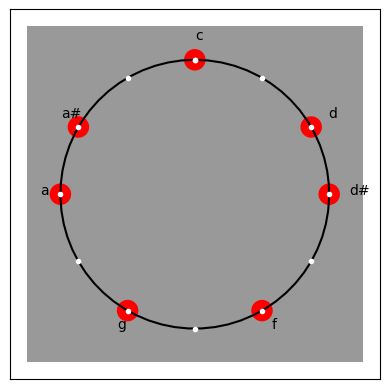

In [57]:
intervals = modes['dorian']
print(intervals)
indxs = np.zeros(len(intervals)+1)
indxs[1:] = np.cumsum(intervals)
# show the pitch ring: 
reload(bip)
b = bip.beep()
bip.makePitchRing(indxs[0:-1])


In [58]:


print(indxs)
print(indxs[-1::-1])
indxs_ud = np.append(indxs, indxs[-1::-1])
print(indxs_ud)

f0 = C3
freqs_ud = notenum2freq(indxs_ud, 0, f0)
print(freqs_ud)

# ==============================
# make an arpeggio of beeps at these frequencies
reload(bip)
dur = 0.9  # seconds
track = np.array([])
b = bip.beep()
env = bip.make_3pt_envelope(int(dur * b.fs), 0.5)

for f in freqs_ud:
    b.make_bip_1f(dur, f, env) # returns normalized waveform
    wf = b.wf 
    track = np.concatenate((track, wf))

ipd.Audio(track, rate=b.fs)


[ 0.  2.  3.  5.  7.  9. 10. 12.]
[12. 10.  9.  7.  5.  3.  2.  0.]
[ 0.  2.  3.  5.  7.  9. 10. 12. 12. 10.  9.  7.  5.  3.  2.  0.]
[261.6255653  293.66476792 311.12698372 349.22823143 391.99543598
 440.         466.16376152 523.2511306  523.2511306  466.16376152
 440.         391.99543598 349.22823143 311.12698372 293.66476792
 261.6255653 ]


# =========================================================
# FUTURE WORK: 
Add microtonal sequences <br>
Add random selection of indexes <br>
Add pitch structures from Chinese, Balinese, Indian classical music forms <br>
